<a href="https://colab.research.google.com/github/lizmosquera/InteligenciaComputacional/blob/master/intento1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tf_nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf_nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf_nightly-2.0-preview


In [0]:
import tensorflow as tf
print (tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import torch
from torch.autograd import Variable
import torch
import matplotlib.pyplot as plt
def plot_series(time,series,format="-",start=0,end=None):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.backend import square, mean
print (tf.keras.__version__)
print (pd.__version__)

2.3.0-tf
1.0.3


In [0]:
df = pd.read_csv('Datos_TRM.csv')
df.index = df['Data Time']
df.tail(5)

,Index,Data Time,TRM,TRM_logn,IBR,YTES1Y_COP,YTES5Y_COP,YTES10Y_COP,YTES1Y_UVR,YTES5Y_UVR,YTES10Y_UVR,FF_EfcRate,FF_UB,WTI_USD,GOLD_USD,VAR_TRM,VAR_LNTRM,MM_5,MM_20
Data Time,,,,,,,,,,,,,,,,,,,
24/04/2020,1276,24/04/2020,4020.94,8.299271,0.03706,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.05,0.25,16.94,1735.6,-17.01,-0.004221,4008.944,3990.5985
27/04/2020,1277,27/04/2020,4039.87,8.303968,0.03675,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,12.78,1723.8,18.93,0.004697,4022.306,3988.2750
28/04/2020,1278,28/04/2020,4039.83,8.303958,0.03677,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,12.34,1722.2,-0.04,-0.000010,4036.720,3990.4750
29/04/2020,1279,29/04/2020,4046.04,8.305494,0.03712,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,15.06,1713.4,6.21,0.001536,4036.926,3990.6370
30/04/2020,1280,30/04/2020,3983.29,8.289863,0.03712,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,15.06,1713.4,-62.75,-0.015631,4025.994,3986.5610


In [0]:
df.columns

Index(['Index', 'Data Time', 'TRM', 'TRM_logn', 'IBR', 'YTES1Y_COP',
       'YTES5Y_COP', 'YTES10Y_COP', 'YTES1Y_UVR', 'YTES5Y_UVR', 'YTES10Y_UVR',
       'FF_EfcRate', 'FF_UB', 'WTI_USD', 'GOLD_USD', 'VAR_TRM', 'VAR_LNTRM',
       'MM_5', 'MM_20'],
      dtype='object')

In [0]:
Target='TRM'
target_name=['TRM']
#Rezago de 82 dias
shift_steps = 82  # dias de 202
#df_target=df[target_name].shift(-shift_steps)
df_target=df[target_name]
df_target.tail(84)

,TRM
Data Time,
30/12/2019,3294.05
31/12/2019,3277.14
2/01/2020,3277.14
3/01/2020,3258.84
7/01/2020,3262.05
...,...
24/04/2020,4020.94
27/04/2020,4039.87
28/04/2020,4039.83


In [0]:
features_considered=['TRM_logn', 'IBR', 'YTES1Y_COP',
       'YTES5Y_COP', 'YTES10Y_COP', 'YTES1Y_UVR', 'YTES5Y_UVR', 'YTES10Y_UVR',
       'FF_EfcRate', 'FF_UB', 'WTI_USD', 'GOLD_USD', 'VAR_TRM', 'VAR_LNTRM',
       'MM_5', 'MM_20']

In [0]:
features = df[features_considered]
features.index = df['Data Time']
features.tail()

,TRM_logn,IBR,YTES1Y_COP,YTES5Y_COP,YTES10Y_COP,YTES1Y_UVR,YTES5Y_UVR,YTES10Y_UVR,FF_EfcRate,FF_UB,WTI_USD,GOLD_USD,VAR_TRM,VAR_LNTRM,MM_5,MM_20
Data Time,,,,,,,,,,,,,,,,
24/04/2020,8.299271,0.03706,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.05,0.25,16.94,1735.6,-17.01,-0.004221,4008.944,3990.5985
27/04/2020,8.303968,0.03675,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,12.78,1723.8,18.93,0.004697,4022.306,3988.2750
28/04/2020,8.303958,0.03677,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,12.34,1722.2,-0.04,-0.000010,4036.720,3990.4750
29/04/2020,8.305494,0.03712,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,15.06,1713.4,6.21,0.001536,4036.926,3990.6370
30/04/2020,8.289863,0.03712,0.038254,0.058496,0.073216,0.01906,0.027594,0.031409,0.04,0.25,15.06,1713.4,-62.75,-0.015631,4025.994,3986.5610


In [0]:
x_data = features.values[0:-shift_steps]
print(type(x_data))
print("Shape:",x_data.shape)

<class 'numpy.ndarray'>
Shape: (1198, 16)


In [0]:
x_data

array([[ 7.78211924e+00,  4.53600000e-02,  4.51952730e-02, ...,
         1.46774430e-02,  2.38273200e+03,  2.39768750e+03],
       [ 7.80020404e+00,  4.52500000e-02,  4.50918130e-02, ...,
         1.80847970e-02,  2.39365200e+03,  2.40011950e+03],
       [ 7.78625691e+00,  4.52300000e-02,  4.56811590e-02, ...,
        -1.39471240e-02,  2.39785400e+03,  2.40131550e+03],
       ...,
       [ 8.09602544e+00,  4.25300000e-02,  4.52821220e-02, ...,
        -7.42044100e-03,  3.31040200e+03,  3.39873700e+03],
       [ 8.09987309e+00,  4.25500000e-02,  4.50387270e-02, ...,
         3.84765000e-03,  3.30473600e+03,  3.38829350e+03],
       [ 8.09472637e+00,  4.25700000e-02,  4.54704670e-02, ...,
        -5.14672000e-03,  3.29507000e+03,  3.37602650e+03]])

In [0]:
y_data = df_target.values[:-shift_steps]
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (1198, 1)


In [0]:
y_data

array([[2397.35],
       [2441.1 ],
       [2407.29],
       ...,
       [3281.4 ],
       [3294.05],
       [3277.14]])

In [0]:
num_data = len(x_data)
train_split = 0.9
num_train = int(train_split * num_data)
num_test = num_data - num_train
#print("Shape:", )
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)
#
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)
#
num_x_signals = x_data.shape[1]
#
num_y_signals = y_data.shape[1]

In [0]:
# Create the Scaler object scaler = StandardScaler()
x_scaled = StandardScaler()

x_train_scaled = x_scaled.fit_transform(x_train)
x_test_scaled=x_scaled.transform(x_test)

In [0]:
y_train_scaled = y_train
y_test_scaled =y_test

In [0]:
#generar los datos
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(1078, 16)
(1078, 1)


In [0]:
#cuando hay muchos datos se utiliza esta funcion para hacelos por batch
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [0]:
batch_size = 256
sequence_length = 20*12
generator = batch_generator(batch_size=batch_size,sequence_length=sequence_length)
x_batch, y_batch = next(generator)
print(x_batch.shape)
print(y_batch.shape)

(256, 240, 16)
(256, 240, 1)


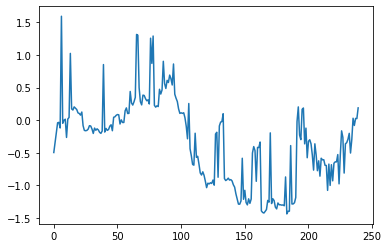

In [0]:
#una de las señales
batch = 0   # First sequence in the batch.
signal = 5  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

In [0]:
#conjunto de validación
validation_data = (np.expand_dims(x_test_scaled, axis=0),np.expand_dims(y_test_scaled, axis=0))

In [0]:
#crear la red
model = Sequential()
#Gated Recurrent Unit con 512 salidas por cada eime-step in la sequencia
model.add(GRU(units=512,return_sequences=True,input_shape=(None, num_x_signals,)))
#función de activación
model.add(Dense(num_y_signals, activation='relu'))#sigmoid

In [0]:
warmup_steps = 50

In [0]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = mean(square(y_true_slice - y_pred_slice))
    
    return mse

In [0]:
#Modelo compilador
optimizer = RMSprop(lr=1e-3)
model.compile(loss=loss_mse_warmup, optimizer=optimizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         814080    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           513       
Total params: 814,593
Trainable params: 814,593
Non-trainable params: 0
_________________________________________________________________


In [0]:
#PARA SALVAR ALGUNOS PUNTOS DURANTE EL APRENDIZAJE CALLBACKS
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)
callback_checkpoint

In [0]:
# CALLBACK PARA PARAR LA OPTIMIZACIÓNCUANDO DESEMPEÑO EMPEORE EN EL CONJUNTO DE VALIDACION
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [0]:
#REPORTE DE LA CORRIDA
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [0]:
#PARA EL APRENDIZAJE SI NO MEJORA LA TASA DE APRENDIZAJE DESPUES DE CIERTAS EPOCHS
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                        patience=0,
                                       verbose=1)

In [0]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [0]:
%%time
model.fit(x=generator,
          epochs=5,
          steps_per_epoch=10,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/5
10/10 [==============================] - ETA: 0s - loss: 8891101.0000
Epoch 00001: val_loss improved from inf to 11423564.00000, saving model to 23_checkpoint.keras
10/10 [==============================] - 63s 6s/step - loss: 8891101.0000 - val_loss: 11423564.0000 - lr: 0.0010
Epoch 2/5
10/10 [==============================] - ETA: 0s - loss: 8804378.0000
Epoch 00002: val_loss improved from 11423564.00000 to 11379152.00000, saving model to 23_checkpoint.keras
10/10 [==============================] - 62s 6s/step - loss: 8804378.0000 - val_loss: 11379152.0000 - lr: 0.0010
Epoch 3/5
10/10 [==============================] - ETA: 0s - loss: 8736299.0000
Epoch 00003: val_loss improved from 11379152.00000 to 11336745.00000, saving model to 23_checkpoint.keras
10/10 [==============================] - 62s 6s/step - loss: 8736299.0000 - val_loss: 11336745.0000 - lr: 0.0010
Epoch 4/5
10/10 [==============================] - ETA: 0s - loss: 8690453.0000
Epoch 00004: val_loss improved fro

In [0]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [0]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 1ms/step - loss: 11265173.0000


In [0]:
print("loss (test-set):", result)

loss (test-set): 11265173.0


In [0]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

**Generar** **prediciones**

In [0]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    #y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    y_pred_rescaled = y_pred
    
    # For each output-signal.
    for signal in range(len(target_name)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_name[signal])
        plt.legend()
        plt.show()

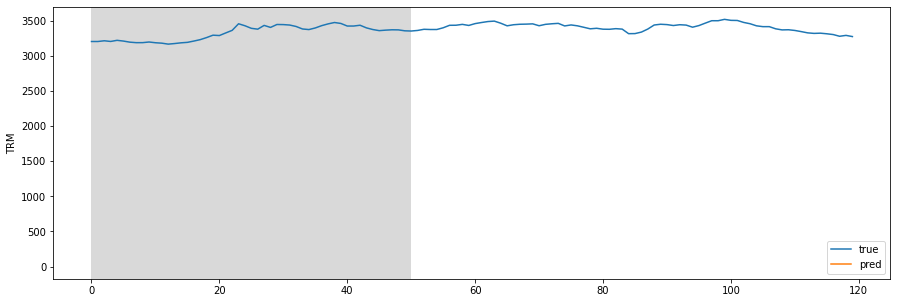

In [0]:
plot_comparison(start_idx=0, length=1200, train=False)

Otro código https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/time_series.ipynb#scrollTo=QYz6RN_mMyau


In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
shuffle_buffer_size = 1000
window_size = 60
batch_size = 100
#train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
#print(x_train.shape)

In [0]:
tf.keras.backend.clear_session() #limpia variable internas
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session() 
dataset=generator

model=tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=[None,None,None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),#capa single LSTM de 32 celdas
  tf.keras.layers.Dense(1), #neurona de salida
  tf.keras.layers.Lambda(lambda x:x*100.0)
])

In [0]:
lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))

optimizer=tf.keras.optimizers.SGD(lr=1e-8,momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])
history=model.fit(generator,epochs=100,callbacks=[lr_schedule])

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  #tf.keras.layers.Conv1D(filters=60, kernel_size=5,strides=1, padding="causal",
 #                    activation="relu",input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])
model.summary()

In [0]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x=generator,epochs=50)

In [0]:
#crear modelo
tf.keras.backend.clear_session()
window_size = 60
batch_size = 64
train_set = windowed_dataset(x_train,window_size,batch_size,shuffle_buffer_size)

model=tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60,kernel_size=5,strides=1, padding="causal",
                         activation="relu",input_shape=[None,1]), #1D convolution con 32 filtros                             
  tf.keras.layers.LSTM(32,return_sequences=True),#capa single LSTM de 32 celdas
  tf.keras.layers.LSTM(32,return_sequences=True),#capa LSTM con 32 celdas
  tf.keras.layers.Dense(30,activation="relu"),#Deep Neural Network
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1), #neurona de salida
  tf.keras.layers.Lambda(lambda x:x*400) #la capa lambda multiplica la x por 400
])

lr_schedule=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8*10**(epoch/20))

optimizer=tf.keras.optimizers.SGD(lr=1e-7,momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history=model.fit(train_set,epochs=60,callbacks=[lr_schedule])

In [0]:

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']
epochs=range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()


zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [0]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [0]:
train_set = windowed_dataset(x_train,window_size=60,batch_size=250, shuffle_buffer_size)

model=tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60,kernel_size=5,strides=1, padding="causal",
                         activation="relu",input_shape=[None,1]), #1D convolution con 32 filtros                             
  tf.keras.layers.LSTM(32,return_sequences=True),#capa single LSTM de 32 celdas
  tf.keras.layers.LSTM(32,return_sequences=True),#capa LSTM con 32 celdas
  tf.keras.layers.Dense(30,activation="relu"),#Deep Neural Network
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1), #neurona de salida
  #tf.keras.layers.Dense(1), #neurona de salida
  tf.keras.layers.Lambda(lambda x:x*400) #la capa lambda multiplica la x por 400
])

optimizer=tf.keras.optimizers.SGD(lr=1e-5,momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history=model.fit(train_set,epochs=500)

In [0]:
train_set = windowed_dataset(x_train,window_size=60,batch_size=250, shuffle_buffer_size)

model=tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32,kernel_size=5,strides=1, padding="causal",
                         activation="relu",input_shape=[None,1]), #1D convolution con 32 filtros                             
  tf.keras.layers.LSTM(60,return_sequences=True),#capa single LSTM de 32 celdas
  tf.keras.layers.LSTM(60,return_sequences=True),#capa LSTM con 32 celdas
  tf.keras.layers.Dense(30,activation="relu"),#Deep Neural Network
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1), #neurona de salida
  #tf.keras.layers.Dense(1), #neurona de salida
  tf.keras.layers.Lambda(lambda x:x*400) #la capa lambda multiplica la x por 400
])

optimizer=tf.keras.optimizers.SGD(lr=1e-5,momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history=model.fit(train_set,epochs=500)

In [0]:
forecast=[] #forecast Vs DAta
#results=[]
for time in range(len(series)-window_size):
  forecast.append(model.predict(series[time:time+window_size][np.newaxis]))

forecast=forecast[split_time-window_size:]
results=np.array(forecast)[:,0,0]

plt.figure(figsize=(10,6))

plot_series(time_valid, x_valid)
plot_series(time_valid,results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

In [0]:
def windowed_dataset(series,window_size,batch_size,shuffle_buffer): #crear un dataset
  series=tf.expand_dims(series, axis=-1) #create a dataset

  ds=tf.data.Dataset.from_tensor_slices(series)
  ds=ds.window(window_size+1,shift=1,drop_remainder=True)#to slice the data up into the appropriate windows
  ds=ds.flat_map(lambda w: w.batch(window_size+1))#flatten the data out flatened into chunksin the suze of our window_size+1
  ds=ds.shuffle(shuffle_buffer)
  ds=ds.map(lambda w:(w[:-1],w[-1])) #shuflet it, choosing smaller number speeds
 
  return ds.batch(batch_size).prefetch(1)#size parameter =2 corresponde Yb